# Árvores de Decisão

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

df = pd.read_csv('../normalizacao/survey_results_salary_numeric.csv', sep=',', encoding='utf-8', index_col=0)
df.head()

,WageAboveAverage,YearsCodeNumber,YearsCodeProNumber,EdLevel_associate,EdLevel_bachelor,EdLevel_doctor,EdLevel_high_school,EdLevel_master,EdLevel_primary_school,EdLevel_professional,EdLevel_unfinished_college,Country_australia,Country_brazil,Country_canada,Country_france,Country_germany,Country_india,Country_italy,Country_netherlands,Country_poland,Country_spain,Country_united_kingdom_of_great_britain_and_northern_ireland,Country_united_states_of_america,Currency_AED,Currency_AUD,Currency_AZN,Currency_BDT,Currency_BRL,Currency_CAD,Currency_CHF,Currency_CZK,Currency_DJF,Currency_EUR,Currency_GBP,Currency_GIP,Currency_IDR,Currency_IMP,Currency_INR,Currency_IRR,Currency_JPY,Currency_KYD,Currency_MAD,Currency_NOK,Currency_NZD,Currency_PLN,Currency_SAR,Currency_TND,Currency_UGX,Currency_USD,Currency_XPF
0,0,14.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,6.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,12.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,12.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Conversão das variáveis categóricas para numéricas

No arquivo `normalizacao/conversao_categorias.ipynb`.

## Legenda

- `WageAboveAverage` (0 ou 1) = Se o salário é acima da média salarial ou não;
- `YearsCodeNumber` (numérico) = Tempo de experiência lidando com código;
- `YearsCodeNumberPro` (numérico) = Tempo de experiência trabalhando com código profissionalmente;
- `EdLevel_*` (coluna categórica transformada em dummy) = Nível de educação acadêmica;
- `Country_*` (coluna categórica transformada em dummy) = País do respondente; foram selecionados os top 12 países mais frequentes;
- `Currency_*` (coluna categórica transformada em dummy) = Moeda em que o respondente recebe seu salário;

## Atributos Previsores e Alvo

In [2]:
previsores = df.iloc[:, 1:].values
previsores

array([[14.,  5.,  0., ...,  0.,  0.,  0.],
       [ 6.,  6.,  0., ...,  0.,  0.,  0.],
       [ 5.,  2.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 5.,  1.,  0., ...,  0.,  1.,  0.],
       [ 6.,  2.,  0., ...,  0.,  0.,  0.],
       [10.,  3.,  0., ...,  0.,  0.,  0.]])

In [3]:
previsores.shape

(23265, 49)

In [4]:
alvo = df.iloc[:, 0].values
alvo

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [5]:
alvo.shape

(23265,)

## Escalonamento

In [6]:
from sklearn.preprocessing import StandardScaler

previsores_esc = StandardScaler().fit_transform(previsores)
previsores_esc

array([[-0.14390853, -0.64732633, -0.19425717, ..., -0.00927219,
        -0.73700829, -0.00927219],
       [-0.96284862, -0.53030055, -0.19425717, ..., -0.00927219,
        -0.73700829, -0.00927219],
       [-1.06521613, -0.99840366, -0.19425717, ..., -0.00927219,
        -0.73700829, -0.00927219],
       ...,
       [-1.06521613, -1.11542943, -0.19425717, ..., -0.00927219,
         1.35683685, -0.00927219],
       [-0.96284862, -0.99840366, -0.19425717, ..., -0.00927219,
        -0.73700829, -0.00927219],
       [-0.55337857, -0.88137788, -0.19425717, ..., -0.00927219,
        -0.73700829, -0.00927219]])

In [7]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,-0.143909,-0.647326,-0.194257,-0.967225,-0.208585,-0.213364,1.665450,-0.060197,-0.117156,-0.356776,-0.184515,-0.234636,-0.248197,-0.243676,-0.364539,-0.306426,-0.184515,-0.194138,-0.20268,-0.204170,2.901556,-0.722207,-0.006556,-0.184266,-0.006556,-0.006556,-0.224151,-0.246239,-0.023645,-0.006556,-0.006556,-0.628784,2.904188,-0.006556,-0.006556,-0.006556,-0.301872,-0.009272,-0.006556,-0.006556,-0.006556,-0.006556,-0.009272,-0.192703,-0.006556,-0.006556,-0.009272,-0.737008,-0.009272
1,-0.962849,-0.530301,-0.194257,-0.967225,-0.208585,-0.213364,1.665450,-0.060197,-0.117156,-0.356776,-0.184515,-0.234636,-0.248197,-0.243676,-0.364539,-0.306426,-0.184515,5.150975,-0.20268,-0.204170,-0.344643,-0.722207,-0.006556,-0.184266,-0.006556,-0.006556,-0.224151,-0.246239,-0.023645,-0.006556,-0.006556,1.590370,-0.344330,-0.006556,-0.006556,-0.006556,-0.301872,-0.009272,-0.006556,-0.006556,-0.006556,-0.006556,-0.009272,-0.192703,-0.006556,-0.006556,-0.009272,-0.737008,-0.009272
2,-1.065216,-0.998404,-0.194257,1.033886,-0.208585,-0.213364,-0.600438,-0.060197,-0.117156,-0.356776,-0.184515,-0.234636,-0.248197,-0.243676,-0.364539,-0.306426,-0.184515,-0.194138,-0.20268,-0.204170,2.901556,-0.722207,-0.006556,-0.184266,-0.006556,-0.006556,-0.224151,-0.246239,-0.023645,-0.006556,-0.006556,-0.628784,2.904188,-0.006556,-0.006556,-0.006556,-0.301872,-0.009272,-0.006556,-0.006556,-0.006556,-0.006556,-0.009272,-0.192703,-0.006556,-0.006556,-0.009272,-0.737008,-0.009272
3,-0.348644,-0.062197,-0.194257,1.033886,-0.208585,-0.213364,-0.600438,-0.060197,-0.117156,-0.356776,-0.184515,-0.234636,-0.248197,-0.243676,-0.364539,-0.306426,-0.184515,-0.194138,-0.20268,-0.204170,-0.344643,1.384645,-0.006556,-0.184266,-0.006556,-0.006556,-0.224151,-0.246239,-0.023645,-0.006556,-0.006556,-0.628784,-0.344330,-0.006556,-0.006556,-0.006556,-0.301872,-0.009272,-0.006556,-0.006556,-0.006556,-0.006556,-0.009272,-0.192703,-0.006556,-0.006556,-0.009272,1.356837,-0.009272
4,-0.348644,-0.647326,-0.194257,1.033886,-0.208585,-0.213364,-0.600438,-0.060197,-0.117156,-0.356776,-0.184515,-0.234636,-0.248197,-0.243676,-0.364539,-0.306426,-0.184515,-0.194138,-0.20268,-0.204170,-0.344643,1.384645,-0.006556,-0.184266,-0.006556,-0.006556,-0.224151,-0.246239,-0.023645,-0.006556,-0.006556,-0.628784,-0.344330,-0.006556,-0.006556,-0.006556,-0.301872,-0.009272,-0.006556,-0.006556,-0.006556,-0.006556,-0.009272,-0.192703,-0.006556,-0.006556,-0.009272,1.356837,-0.009272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23260,-0.860481,-0.998404,5.147815,-0.967225,-0.208585,-0.213364,-0.600438,-0.060197,-0.117156,-0.356776,-0.184515,-0.234636,-0.248197,-0.243676,2.743192,-0.306426,-0.184515,-0.194138,-0.20268,-0.204170,-0.344643,-0.722207,-0.006556,-0.184266,-0.006556,-0.006556,-0.224151,-0.246239,-0.023645,-0.006556,-0.006556,1.590370,-0.344330,-0.006556,-0.006556,-0.006556,-0.301872,-0.009272,-0.006556,-0.006556,-0.006556,-0.006556,-0.009272,-0.192703,-0.006556,-0.006556,-0.009272,-0.737008,-0.009272
23261,0.572664,0.639957,-0.194257,1.033886,-0.208585,-0.213364,-0.600438,-0.060197,-0.117156,-0.356776,-0.184515,-0.234636,-0.248197,-0.243676,-0.364539,-0.306426,-0.184515,-0.194138,-0.20268,-0.204170,-0.344643,1.384645,-0.006556,-0.184266,-0.006556,-0.006556,-0.224151,-0.246239,-0.023645,-0.006556,-0.006556,-0.628784,-0.344330,-0.006556,-0.006556,-0.006556,-0.301872,-0.009272,-0.006556,-0.006556,-0.006556,-0.006556,-0.009272,-0.192703,-0.006556,-0.006556,-0.009272,1.356837,-0.009272
23262,-1.065216,-1.115429,-0.194257,1.033886,-0.208585,-0.213364,-0.600438,-0.060197,-0.117156,-0.356776,-0.184515,-0.234636,-0.248197,-0.243676,-0.364539,-0.306426,-0.184515,-0.194138,-0.20268,-0.204170,-0.344643,1.384645,-0.006556,-0.1842

In [8]:
previsoresdf.dropna(inplace=True)

## Base de Treino e Teste

In [9]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, alvo, test_size = 0.3, random_state = 0)

In [10]:
x_treino.shape

(16285, 49)

In [11]:
x_teste.shape

(6980, 49)

In [12]:
y_treino.shape

(16285,)

In [13]:
y_teste.shape

(6980,)

## Árvore de Decisão

[Text(0.5229166666666667, 0.9166666666666666, 'X[21] <= 0.331\nentropy = 0.92\nsamples = 16285\nvalue = [5449, 10836]'),
 Text(0.26666666666666666, 0.75, 'X[1] <= -0.589\nentropy = 1.0\nsamples = 10743\nvalue = [5248, 5495]'),
 Text(0.13333333333333333, 0.5833333333333334, 'X[36] <= 1.505\nentropy = 0.888\nsamples = 4119\nvalue = [2861, 1258]'),
 Text(0.06666666666666667, 0.4166666666666667, 'X[12] <= 1.89\nentropy = 0.943\nsamples = 3289\nvalue = [2104, 1185]'),
 Text(0.03333333333333333, 0.25, 'X[26] <= 2.119\nentropy = 0.907\nsamples = 2978\nvalue = [2019, 959]'),
 Text(0.016666666666666666, 0.08333333333333333, 'entropy = 0.936\nsamples = 2652\nvalue = [1717, 935]'),
 Text(0.05, 0.08333333333333333, 'entropy = 0.379\nsamples = 326\nvalue = [302, 24]'),
 Text(0.1, 0.25, 'X[1] <= -0.94\nentropy = 0.846\nsamples = 311\nvalue = [85, 226]'),
 Text(0.08333333333333333, 0.08333333333333333, 'entropy = 0.994\nsamples = 99\nvalue = [45, 54]'),
 Text(0.11666666666666667, 0.08333333333333333,

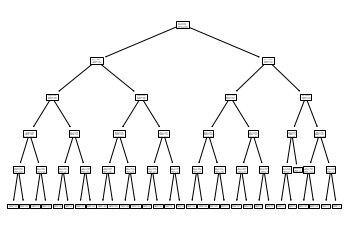

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=5)
_arvore = arvore.fit(x_treino, y_treino)

tree.plot_tree(_arvore)

In [15]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [16]:
y_teste

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_arvore) * 100.0))

Acurácia: 81.06%


In [19]:
confusion_matrix(y_teste, previsoes_arvore)

array([[1467,  792],
       [ 530, 4191]], dtype=int64)

In [20]:
print(classification_report(y_teste, previsoes_arvore))

              precision    recall  f1-score   support

           0       0.73      0.65      0.69      2259
           1       0.84      0.89      0.86      4721

    accuracy                           0.81      6980
   macro avg       0.79      0.77      0.78      6980
weighted avg       0.81      0.81      0.81      6980



## Treino

In [21]:
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [22]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))

Acurácia: 81.25%


In [23]:
confusion_matrix(y_treino, previsoes_treino)

array([[3589, 1860],
       [1193, 9643]], dtype=int64)